# Single timepoint models of dynamic systems



![IGF](../EGFR/IGF-high-level-figure.png)

In [1]:
import time

print(time.asctime())

def check(value, message):
    """If 'value' is None, prints an error message constructed using
    'message' and then exits with status code 1.  If 'value' is an integer,
    it assumes it is a libSBML return status code.  If the code value is
    LIBSBML_OPERATION_SUCCESS, returns without further action; if it is not,
    prints an error message constructed using 'message' along with text from
    libSBML explaining the meaning of the code, and exits with status code 1.
    """
    if value == None:
         raise libsbml.SystemExit('LibSBML returned a null value trying to ' + message + '.')
    elif type(value) is int:
        if value == libsbml.LIBSBML_OPERATION_SUCCESS:
            return
        else:
            err_msg = 'Error encountered trying to ' + message + '.' \
                 + 'LibSBML returned error code ' + str(value) + ': "' \
                 + libsbml.OperationReturnValue_toString(value).strip() + '"'
            raise libsbml.SystemExit(err_msg)
    else:
         return

Thu Dec 17 22:33:04 2020


# Convert EGFR model to SBML

In [12]:
import pandas as pd

excel = '../EGFR/rsfs20130019supp1.xlsx'
species = pd.read_excel(excel,sheet_name='Species',index_col='Name', engine='openpyxl')
species

/Users/zuck016/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,InitialAmount,InitialAmountUnits,ConstantAmount,BoundaryCondition,Notes,Tag
Name,,,,,,
IGF,1.350000e-09,concentration (M),False,True,NaN,NaN
IGFR,4.000000e+04,molecules/cell,False,False,NaN,NaN
IGFR_p,0.000000e+00,molecules/cell,False,False,NaN,NaN
IGF__IGFR,0.000000e+00,molecules/cell,False,False,NaN,NaN
IGF__IGFR_p,0.000000e+00,molecules/cell,False,False,NaN,NaN
...,...,...,...,...,...,...
IGFR__IGFRinh,0.000000e+00,molecules/cell,False,False,NaN,NaN
mTor_p__IRS_p__Grb2SOS__RasGDP,0.000000e+00,molecules/cell,False,False,NaN,NaN
mTor_p__IRS_p__PI3K__Grb2SOS__RasGDP,0.000000e+00,molecules/cell,False,False,NaN,NaN


In [13]:
from IPython.display import HTML
species[species['InitialAmount'] > 0]

,InitialAmount,InitialAmountUnits,ConstantAmount,BoundaryCondition,Notes,Tag
Name,,,,,,
IGF,1.350000e-09,concentration (M),False,True,NaN,NaN
IGFR,4.000000e+04,molecules/cell,False,False,NaN,NaN
PTB1B,6.000000e+04,molecules/cell,False,False,NaN,NaN
IRS,1.230000e+05,molecules/cell,False,False,NaN,NaN
PI3K,2.000000e+05,molecules/cell,False,False,NaN,NaN
AKT,5.200000e+06,molecules/cell,False,False,NaN,NaN
Pase,2.500000e+04,molecules/cell,False,False,NaN,NaN
Grb2SOS,5.300000e+04,molecules/cell,False,False,NaN,NaN
RasGDP,1.220000e+05,molecules/cell,False,False,NaN,NaN


In [14]:
bool(species.loc['mTorinh'].to_dict()['BoundaryCondition'])

True

In [15]:
compartments = pd.read_excel(excel,sheet_name='Compartments', index_col='Name', engine='openpyxl')
compartments

/Users/zuck016/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Capacity,CapacityUnits,ConstantCapacity,Parent
Name,,,,
Cell,1,cell,True,NaN


In [32]:
import foo


ModuleNotFoundError: No module named 'foo'

In [34]:
try:
    import libsbml
except ModuleNotFoundError:
    !pip install libsbml


In [16]:
import libsbml
m = libsbml.Model(3,1)
compartments = pd.read_excel(excel,sheet_name='Compartments', index_col='Name')
for compartment in compartments.index:
    atts = compartments.loc[compartment].to_dict()
    c = m.createCompartment()
    check(c, "create compartment {}".format(compartment))
    check(c.setId(compartment),    "set id of compartment {}".format(compartment))
    check(c.setSize(float(atts['Capacity'])),  "set capacity to {}".format(atts['Capacity']))
    check(c.setConstant(bool(atts['ConstantCapacity'])),  "set compartment to constant")
    
for specie in species.index:
    atts = species.loc[specie].to_dict()
    s = m.createSpecies()
    check(s,   "create species {}".format(specie))
    check(s.setId(specie),  "set species {} id".format(specie))
    check(s.setName(specie),  "set species {} name".format(specie))
    check(s.setInitialAmount(atts['InitialAmount']), "set initial amount {} for specie {}".format(
        atts['InitialAmount'], specie))
    check(s.setCompartment(compartment),  "set compartment to {}".format(compartment))
    check(s.setHasOnlySubstanceUnits(True),  "set substance units to mole")
    check(s.setConstant(bool(atts['ConstantAmount'])),  "set specie {} to constant amount {}".format(
            specie, atts['ConstantAmount']))
    
    check(s.setBoundaryCondition(bool(atts['BoundaryCondition'])), "set specie {} boundary condition to {}".format(
            specie, bool(atts['BoundaryCondition'])))
   

In [17]:
parameters = pd.read_excel(excel,sheet_name='Parameters', index_col='Name')
parameters

,Value,ValueUnits,ConstantValue,Notes,Tag
Name,,,,,
lig_time,0.0,NaN,False,NaN,NaN
inh0,0.0,NaN,False,NaN,NaN
inh1,0.0,NaN,False,NaN,NaN
k1,400000.0,1/(Molar*seconds),False,1. IGF binding,NaN
k1a,400000.0,1/(Molar*seconds),False,1. IGF binding,NaN
...,...,...,...,...,...
kd301a,0.5,NaN,True,21. AKT inhibition,NaN
k302,500000000.0,NaN,True,22. IGFR inhibitor,NaN
kd302,0.5,NaN,True,22. IGFR inhibitor,NaN


In [18]:
for parameter in parameters.index:
    atts = parameters.loc[parameter].to_dict()
    k = m.createParameter()
    check(k,  "create parameter")
    check(k.setId(parameter),  "set parameter {}".format(parameter))
    check(k.setConstant(bool(atts['ConstantValue'])), "set paramter {} to constant = {}".format(
        parameter, bool(atts['ConstantValue'])))
    check(k.setValue(atts['Value']),  "set value of parameter {} to value {}".format(
        parameter, atts['Value']))
    
    

In [19]:
import numpy as np


In [20]:
rxns = pd.read_excel(excel,sheet_name='Reactions',index_col='Name')
for i,rxn in enumerate(rxns.index):
    atts = rxns.loc[rxn].to_dict()
    r = m.createReaction()
    check(r,  "create reaction")
    check(r.setId('rxn_{}'.format(i)),   "set reaction id")
    check(r.setName(rxn),  "set reaction name")
    check(r.setReversible(bool(atts['Reversible'])), "Set reversible")
    check(r.setFast(bool(atts['Active'])), "Set Fast")

    reactant1 = r.createReactant()
    check(reactant1, "create reactant1")
    check(reactant1.setSpecies(atts['Reactant1']), "assign reactant 1 species")
    check(reactant1.setConstant(bool(species.loc[atts['Reactant1'],'ConstantAmount'])),
          "set {} to constant {}".format(atts['Reactant1'], bool(species.loc[atts['Reactant1'], 'ConstantAmount'])))
    if atts['Reactant2'] and type(atts['Reactant2']) is str:
        reactant2 = r.createReactant()
        check(reactant2, "create reactant 2")
        check(reactant2.setSpecies(atts['Reactant2']), "assign reactant 2 species")
        check(reactant2.setConstant(bool(species.loc[atts['Reactant2'],'ConstantAmount'])),
          "set {} to constant {}".format(atts['Reactant2'], bool(species.loc[atts['Reactant2'], 'ConstantAmount'])))
    product1 = r.createProduct()
    check(product1,  "create product 1")
    check(product1.setSpecies(atts['Product1']),  "assign product 1 species")
    check(product1.setConstant(bool(species.loc[atts['Product1'],'ConstantAmount'])),
          "set {} to constant {}".format(atts['Product1'], bool(species.loc[atts['Product1'], 'ConstantAmount'])))

    if atts['Product2'] and type(atts['Product2']) is str:
        product2 = r.createProduct()
        check(product2,  "create product 2")
        check(product2.setSpecies(atts['Product2']), "assign product 2 species")
        check(product2.setConstant(bool(species.loc[atts['Product2'],'ConstantAmount'])),
          "set {} to constant {}".format(atts['Product2'], bool(species.loc[atts['Product2'], 'ConstantAmount'])))
       
    
    math_ast = libsbml.parseL3Formula(atts['ReactionRate'])
    check(math_ast,   "create AST for rate expression")
    kinetic_law = r.createKineticLaw()
    check(kinetic_law,  "create kinetic law")
    check(kinetic_law.setMath(math_ast),  "set math on kinetic law")
    



In [21]:


d = libsbml.SBMLDocument(3,1)
d.setModel(m)
w = libsbml.SBMLWriter()
w.writeSBML(d, '../EGFR/EGFR.sbml')

True

In [22]:
!ls -l ../EGFR


total 2080
-rw-r--r--  1 zuck016  PNL\Domain Users  302923 Dec 17 17:14 EGFR-layout.sbml
-rw-r--r--  1 zuck016  PNL\Domain Users   13963 Dec 17 17:14 EGFR.ant
-rw-r--r--  1 zuck016  PNL\Domain Users   31989 Dec 17 17:14 EGFR.pdf
-rw-r--r--  1 zuck016  PNL\Domain Users   69441 Dec 17 19:24 EGFR.sbml
-rw-r--r--  1 zuck016  PNL\Domain Users  548600 Dec 17 19:22 IGF-high-level-figure.png
-rw-r--r--  1 zuck016  PNL\Domain Users   27990 Dec 17 17:14 rsfs20130019supp1.xlsx
-rw-r--r--  1 zuck016  PNL\Domain Users     171 Dec 17 19:18 ~$rsfs20130019supp1.xlsx


In [35]:
try:
    import tellurium
except ModuleNotFoundError:
    !pip install tellurium

In [23]:
import tellurium as te
r = te.loadSBMLModel('../EGFR/EGFR.sbml')


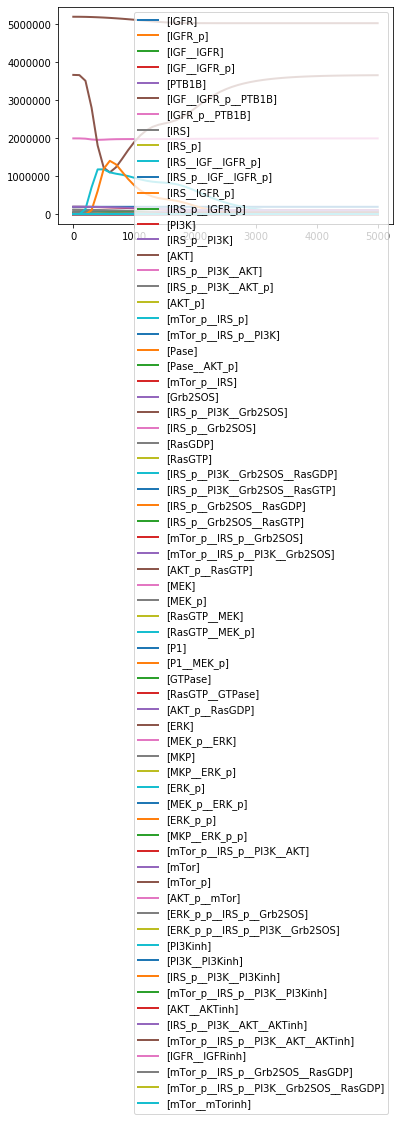

In [24]:
result = r.simulate(0, 5000)
r.plot(result)

In [25]:
ant = te.sbmlToAntimony('../EGFR/EGFR.sbml')
with open('../EGFR/EGFR.ant', 'w') as out:
    out.write(ant)
print(ant)

// Created by libAntimony v2.12.0
model *doc0()

  // Compartments and Species:
  compartment Cell;
  substanceOnly species $IGF in Cell, IGFR in Cell, IGFR_p in Cell, IGF__IGFR in Cell;
  substanceOnly species IGF__IGFR_p in Cell, PTB1B in Cell, IGF__IGFR_p__PTB1B in Cell;
  substanceOnly species IGFR_p__PTB1B in Cell, IRS in Cell, IRS_p in Cell;
  substanceOnly species IRS__IGF__IGFR_p in Cell, IRS_p__IGF__IGFR_p in Cell;
  substanceOnly species IRS__IGFR_p in Cell, IRS_p__IGFR_p in Cell, PI3K in Cell;
  substanceOnly species IRS_p__PI3K in Cell, AKT in Cell, IRS_p__PI3K__AKT in Cell;
  substanceOnly species IRS_p__PI3K__AKT_p in Cell, AKT_p in Cell, mTor_p__IRS_p in Cell;
  substanceOnly species mTor_p__IRS_p__PI3K in Cell, Pase in Cell, Pase__AKT_p in Cell;
  substanceOnly species mTor_p__IRS in Cell, Grb2SOS in Cell, IRS_p__PI3K__Grb2SOS in Cell;
  substanceOnly species IRS_p__Grb2SOS in Cell, RasGDP in Cell, RasGTP in Cell;
  substanceOnly species IRS_p__PI3K__Grb2SOS__RasGDP in 

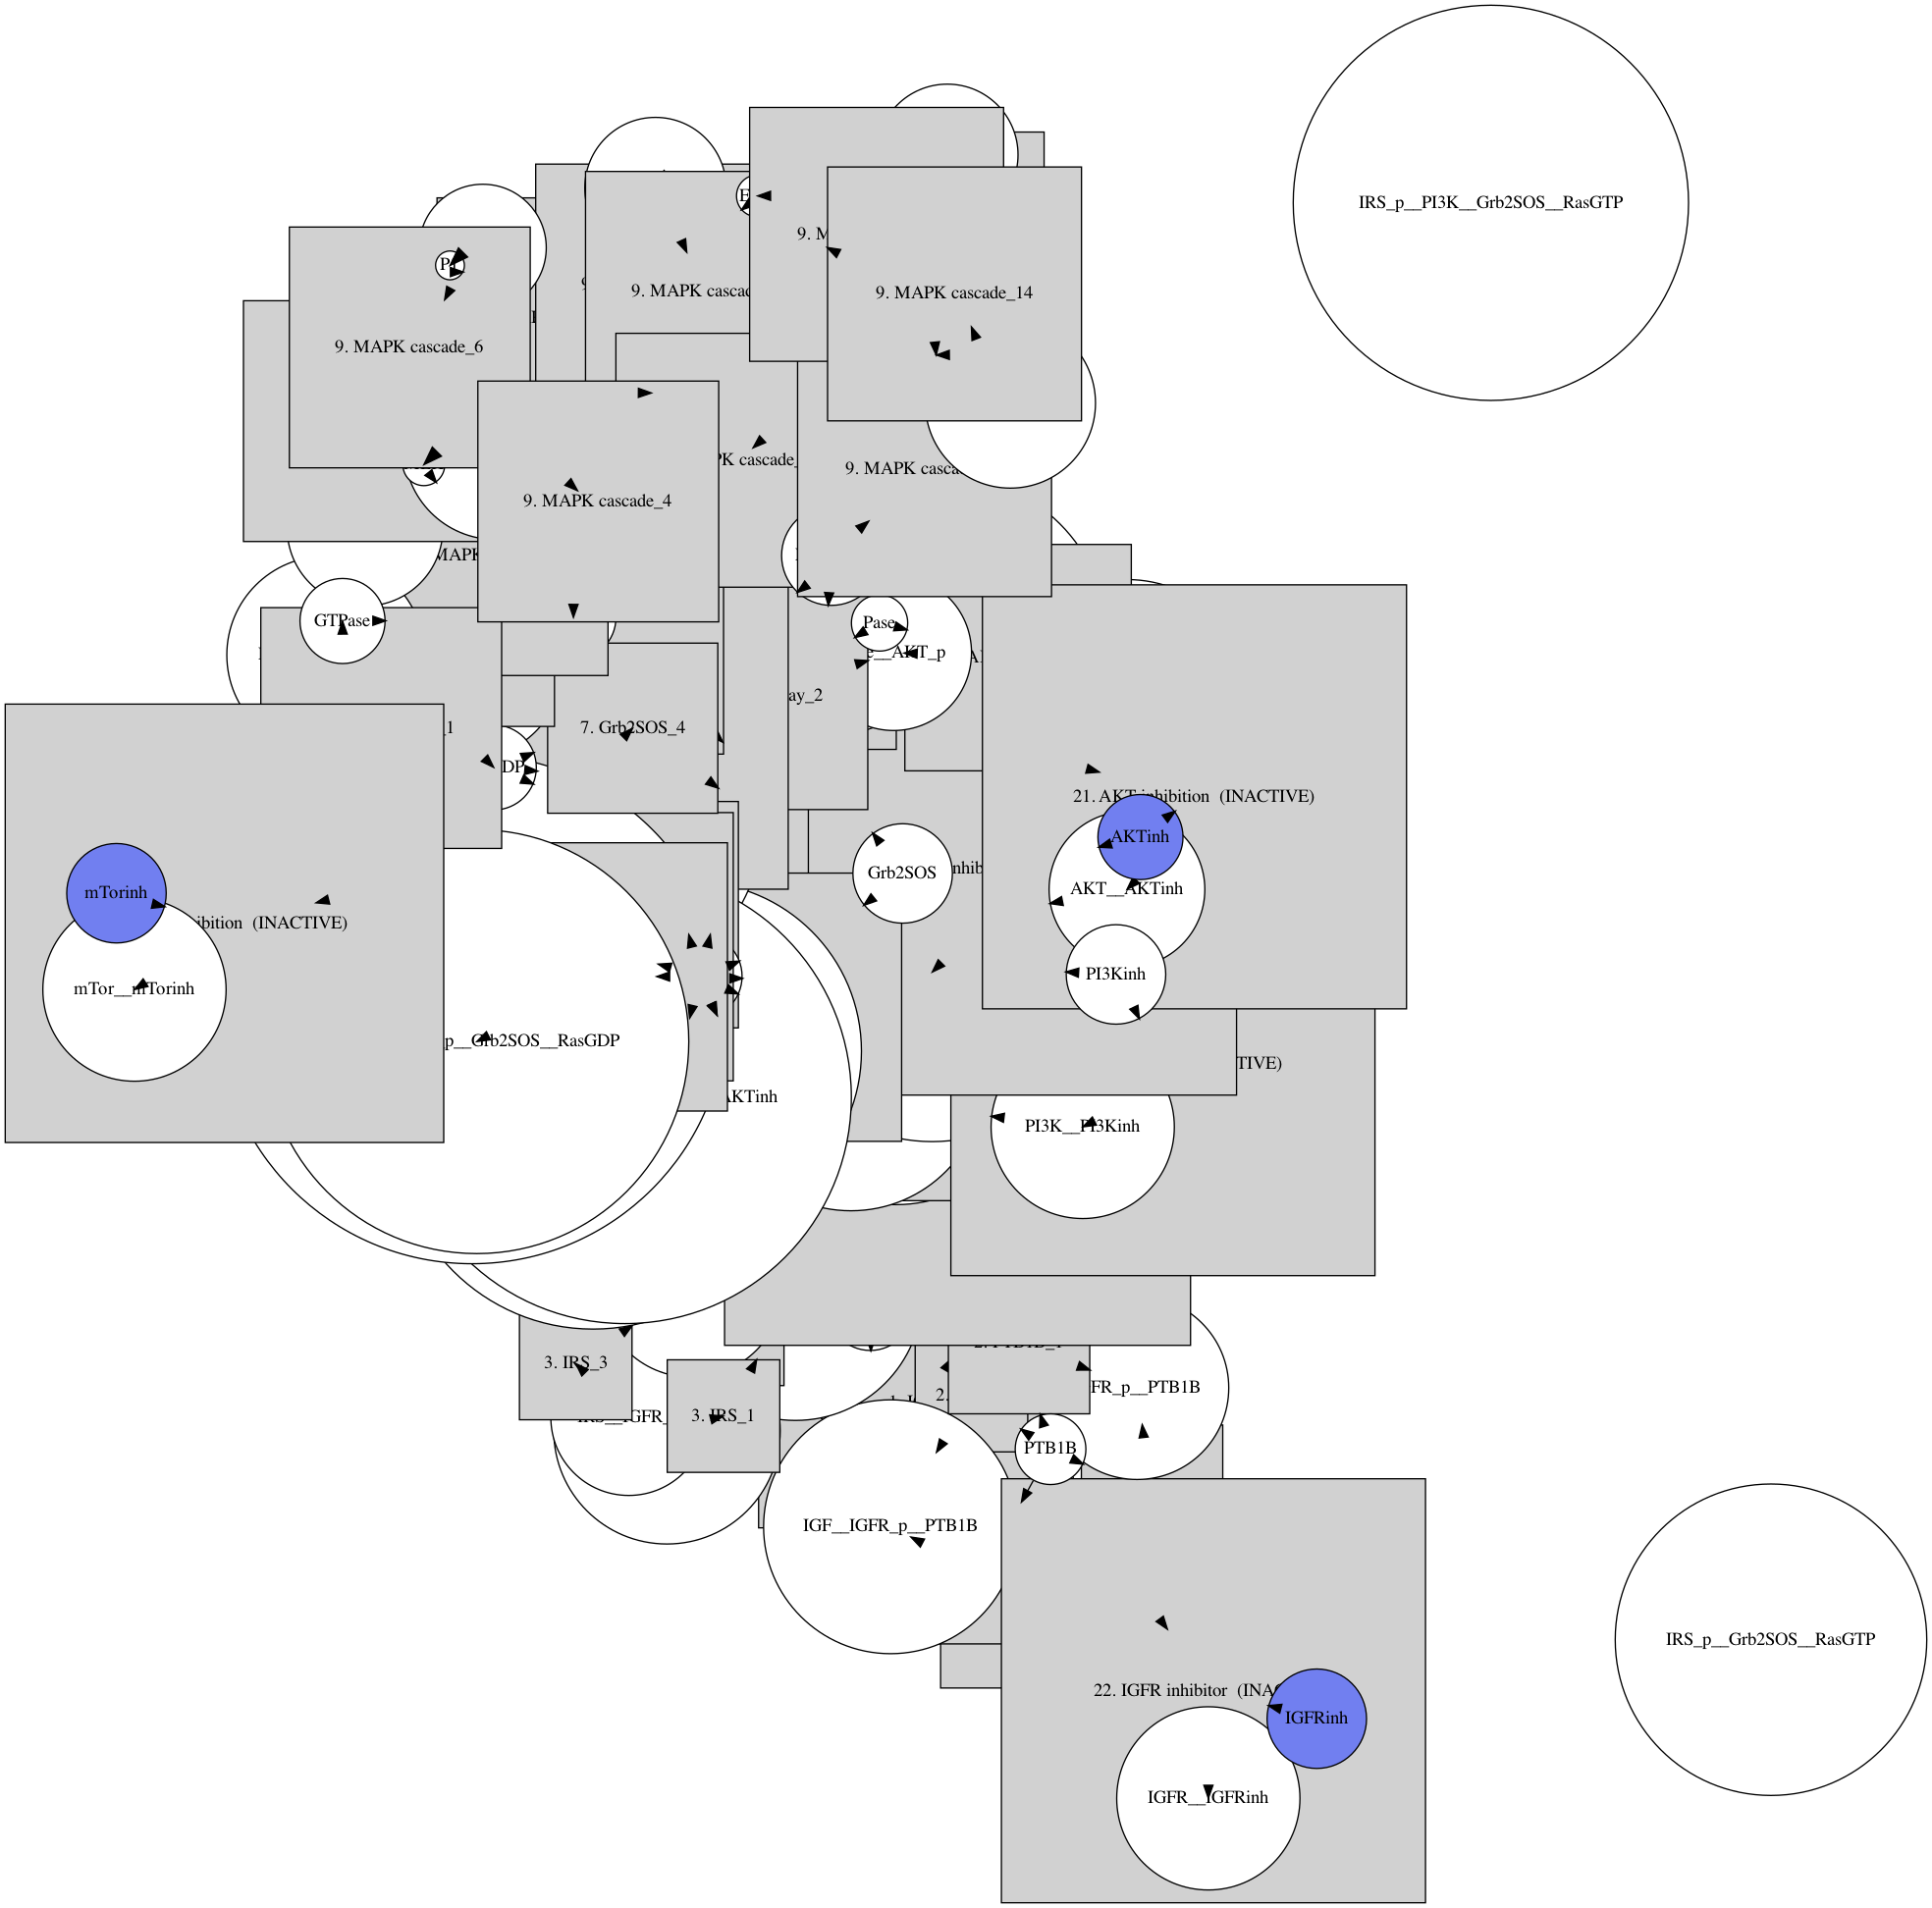

In [26]:
r.draw(width=300)

In [28]:
with open('simbio_result.csv','w') as out:
    result.tofile(out,sep=",")

In [29]:
dir(result)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [36]:
%matplotlib inline
try:
    import libsbml_draw
except ModuleNotFoundError:
    !pip install libsbml_draw
from libsbml_draw import SBMLlayout

s = SBMLlayout("../EGFR/EGFR.sbml")

s.drawNetwork("../EGFR/EGFR.pdf", dpi=25, scaling_factor=.25, show=False)

#s.drawNetwork()

updating network


In [37]:
s.writeSBML("../EGFR/EGFR-layout.sbml")


0